<a href="https://colab.research.google.com/github/ranjithsrajan/PyLab/blob/main/M1_MP1_NB_Gradient_Descent_Loss_Minimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science and Machine Learning
## A program by IIT Madras and TalentSprint
### Mini Project: Gradient Descent Loss Minimization

## Learning Objectives

At the end of the mini project, you will be able to

* understand Optimization, apply optimization algorithms
* Understand the intuition behind ordinay least squares (OLS). How is the best fit found? How do you actually implement gradient descent?
* Loading and looking at data and implementing
  - Cost function
  - Gradient descent variants

**Packages used:**  
* `Pandas` for data frames and easy to read csv files  
* `Numpy` for array and matrix mathematics functions  
* `Matplotlib` and `Seaborn` for visualization
*  `sklearn` for the metrics and pre-processing


### Dataset Description

The dataset chosen for this mini project is [California Housing Price Data Set](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html) with 20640 instances each having 9 attributes.

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. The data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are self explanatory:

:Attribute Information:

    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude
    - Housing_Value   the median of the house value for California district


## Grading = 10 Points

### Download the data

In [ ]:
#@title Load the dataset
!wget -qq https://cdn.extras.talentsprint.com/ADSMI/Datasets/California_housing.csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import random

**Exercise 1**: Load the data and perform the following (2 points)
- Exploratory Data Analysis
- Preprocessing


**Hints:**
- Import the dataset as dataframe using `read_csv()` method of `pandas` package
- checking for the number of rows and columns using `shape` attribute of `pandas` dataframe
- Show the top 5 and the last 5 rows of the data using `head()` method
- summary of the dataset
- statistical description of the features using `describe()` method of `pandas` package
- check for the null values, and handle them if *any*

In [12]:
# YOUR CODE HERE
print("Loading California Housing File")
house_data = pd.read_csv('California_housing.csv')
print("Dataset Loaded Successfully")
(rows,coloums) = house_data.shape
print("Number of rows: ",rows)
print("Number of coloumns: ",coloums)
print("--------------------------------------")
print("Top 5 Rows")
display(house_data.head())
print("--------------------------------------")
print("Last 5 Rows")
display(house_data.tail())
print("--------------------------------------")
print("Summary Of the Dataset")
house_data.info()
print("--------------------------------------")
print("Statistical Description of the Dataset")
house_data.describe(include='all')
print("--------------------------------------")
print("Null Values Check")
if house_data.isnull().values.any():
  print("There are null values in the dataset")
  null_columns = house_data.columns[house_data.isnull().any()]
  print("Null Columns: ",null_columns)
  house_data = house_data.drop(columns=null_columns)
else:
  print("There are no null values in the dataset")
print("--------------------------------------")

Loading California Housing File
Dataset Loaded Successfully
Number of rows:  20640
Number of coloumns:  9
--------------------------------------
Top 5 Rows


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Housing_Value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


--------------------------------------
Last 5 Rows


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Housing_Value
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


--------------------------------------
Summary Of the Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   Housing_Value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
--------------------------------------
Statistical Description of the Dataset
--------------------------------------
Null Values Check
There are no null values in the dataset
--------------------------------------


**Exercise 2**: Data Visualization (2 points)

- Visualize the Latitude and Longitude using the Population as size using `plot()` method and experiment with various parameters of that method
- Plot the distribution of all the variables as histograms using `hist()` method of dataframe object and set the `bins` parameter
- Correlations between variables as heatmap using `heatmap()` method of `seaborn` package
- Analyze the results between target and other features using `pairplot()` function of `seaborn` package

Viasualizing Latitude and Longitude using the Population as size
--------------------------------------
Viasualizing Population Histograms
--------------------------------------


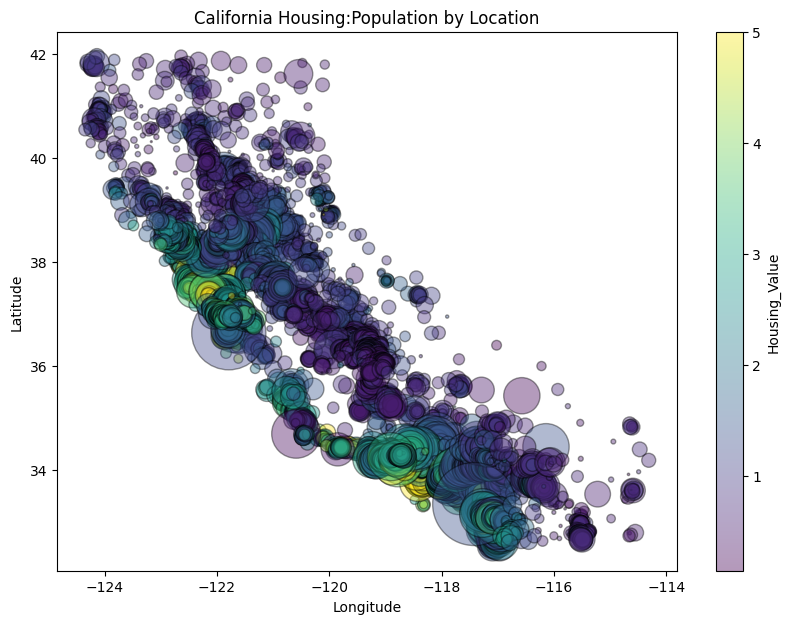

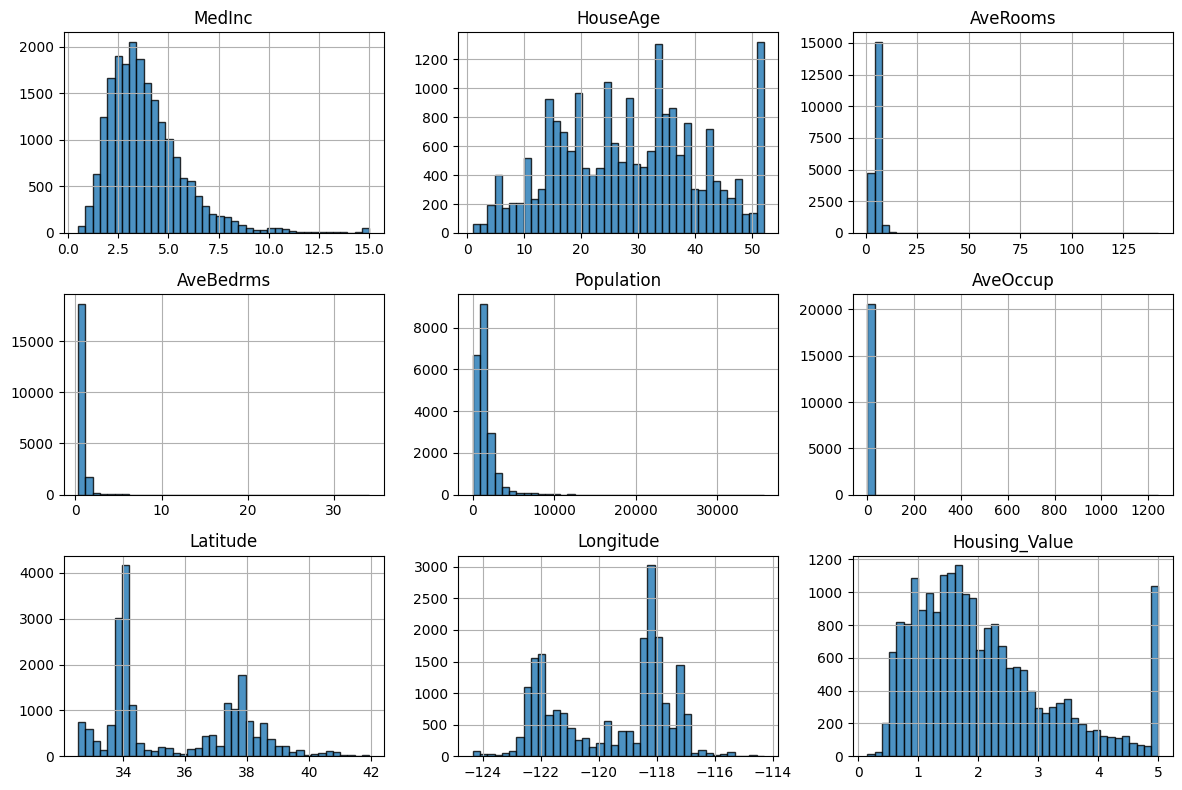

Viasualizing Population Using Heatmaps
--------------------------------------


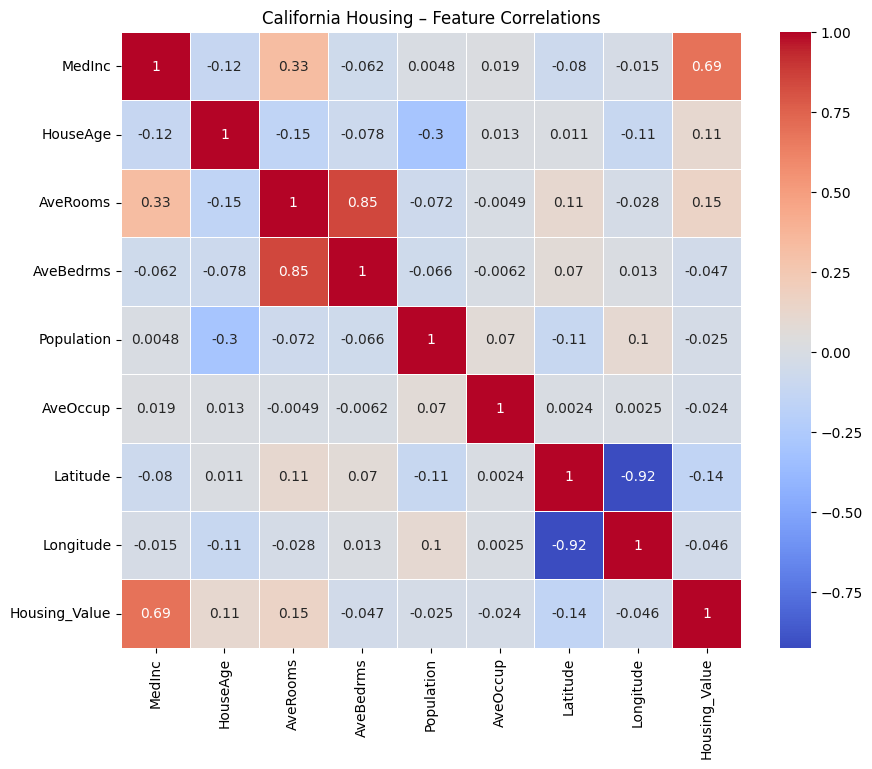

Viasualizing Pairwise RelationShip Using PairPlot
--------------------------------------


In [14]:
# YOUR CODE HERE
# YOUR CODE HERE
print("Viasualizing Latitude and Longitude using the Population as size")
print("--------------------------------------")
house_data.plot(kind="scatter",
                x="Longitude",
                y="Latitude",
                s=house_data["Population"]/10,
                alpha=0.4,
                title="California Housing:Population by Location",
                figsize=(10,7),
                c="Housing_Value",
                cmap="viridis",
                colorbar=True,
                edgecolor='black'
                )
print("Viasualizing Population Histograms")
print("--------------------------------------")
population_array = house_data.hist(
    bins=40,
    figsize=(12,8),
    alpha=0.8,
    edgecolor='black'
)
plt.tight_layout()
plt.show()
print("Viasualizing Population Using Heatmaps")
print("--------------------------------------")

correlationMatrix = house_data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlationMatrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("California Housing – Feature Correlations")
plt.show()

print("Viasualizing Pairwise RelationShip Using PairPlot")
print("--------------------------------------")

sns.pairplot(house_data,vars=['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude','Housing_Value'],
             hue=None,corner=True,diag_kind='kde',plot_kws={'alpha':0.5})
plt.suptitle("California Housing – Pairwise Relationships", y=1.02)
plt.show()



**Exercise 3:** Data Preparation (3 Points)

 - Create new features:

    - Create possible new features based on the existing data
  
      For eg. `bedrooms per room` = AveBedrms / AveRooms

- Identify the `features`, `target` from the given set of attributes

  - Save the `features` in **features** variable and `target` column (our target column for prediction) in **target** variable
  - Use `drop()` method of dataframe to drop target column when saving remaining columns to `features` variable
  
  (ex. `features = df.drop('target_column', axis = 1)`



- Split the data (**features**, **target**) into train, test using `train_test_split()` method of `sklearn.model_selection()` package

- Normalization
  - Normalize the numerical columns of dataset using `StandardScaler()` or `MinMaxScaler()` and fit them to the dataset using `fit()` method


In [ ]:
#  YOUR CODE HERE

## Find the best fit line using

- Gradient descent

### Gradient Descent loss minimization


The idea behind gradient descent is by gradually tuning parameters, such as slope (m) and the intercept (b) in our regression function $y = mx + b$, Minimize cost of a function that tells how far off model predicted result. For regression problems use mean squared error (MSE) cost function.

$$ MSE = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2 \quad \textrm{where} \quad \hat{y_i} = mx_i + b $$
Now, Figure out how to tweak parameters m and b to reduce MSE.

**Partial Derivatives**

Use partial derivatives to find how each individual parameter affects MSE. Take the derivative with respect to m and b separately. Take a look at the formula below. It looks almost exactly the same as MSE, but this time add f(m, b) to it. then plug m and b numbers into it and calculate the result.

$$𝑓(𝑚,𝑏)= \frac{1}{n}\sum_{i=1}^{n}(y_i - (mx_i+b))^2$$
This function is better representation for further calculations of partial derivatives.

**Partial Derivative With Respect to m**

With respect to m means we derive parameter m and ignore what is going on with b, or it is 0. To derive with respect to m we will use chain rule.

$$ [f(g(x))]' = f'(g(x)) * g(x)' \: - \textrm{chain rule}$$
Chain rule applies when one function sits inside of another. Lets write these steps down:

$$ (y - (mx + b))^2 $$
1. Derivative of $(f)^2$ is $2(f)$, same as $x^2$ becomes $2x$
2. We do nothing with $y - (mx + b)$, so it stays the same
3. Derivative of $y - (mx + b)$ with respect to m is $(0 - (x + 0))$ or $-x$, because y and b are constants, they become 0, and derivative of mx is x

Multiply all parts we get following: $2 * (y - (mx+b)) * -x$. if we move -x to the left: $-2x *(y-(mx+b))$. The final version of our derivative is the following:

$$\frac{\partial f}{\partial m} = \frac{1}{n}\sum_{i=1}^{n}-2x_i(y_i - (mx_i+b))$$
Here, $\frac{df}{dm}$ means we find partial derivative of function f (we mentioned it earlier) with respect to m.

**Partial Derivative With Respect to b**

Same rules apply to the derivative with respect to b.

  $y - (mx + b)$ becomes $(0 - (0 + 1))$ or $-1$, because y and mx are constants, they become 0, and derivative of b is 1

Multiply all the parts together and we get $-2(y-(mx+b))$

$$\frac{\partial f}{\partial b} = \frac{1}{n}\sum_{i=1}^{n}-2(y_i - (mx_i+b))$$

**Final Function**

1. Gradient descent is an iterative process and with each iteration (epoch) we slightly minimizing MSE, so each time we use our derived functions to update parameters m and b
2. Because its iterative, we should choose how many iterations we take, or make algorithm stop when we approach minima of MSE. In other words when algorithm is no longer improving MSE, we know it reached minimum.
3. Gradient descent has an additional parameter learning rate (lr), which helps control how fast or slow algorithm going towards minima of MSE
Thats about it. So you can already understand that Gradient Descent for the most part is just process of taking derivatives and using them over and over to minimize function.

**Exercise 4:** Find the best fit line using Gradient descent and visualize the results (3 points)

**Hints:**
       
- write a function to return predicted(y), when inputs are : x, weight and intercept
- write a function to return linear loss, when inputs are : y_true and y_predicted
- write a function to return derivative of loss w.r.t weight, when inputs are : x, y_true, and y_predicted
- write a function to return derivative of loss w.r.t bias, when inputs are : y_true, and y_predicted
- write a function to perform gradient descent, when inputs are : x and y
- write a function to return derivative of loss w.r.t bias, when inputs are : y_true, and y_predicted
- use all the above functions to predict, display the results and the accuracy

Read this [article](https://medium.com/analytics-vidhya/implementing-gradient-descent-for-multi-linear-regression-from-scratch-3e31c114ae12) for more information

In [ ]:
#  YOUR CODE HERE

In [ ]:
# YOUR CODE(s) HERE